In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation

#############################
# PARAMÈTRES DE LA SIMULATION
#############################
g = 9.81             # accélération de la pesanteur
l0 = 1              # longueur à vide du ressort
k = 10               # constante de raiseur du ressort
m = .2               # masse du point matériel
a = .1               # coefficient de frottement (linéaire)
leq = l0 + m * g / k # calcul de la position d'équilibre
duration = 60        # durée de la simulation
fps      = 25        #

# CONDITIONS INITIALES
V0 = [leq, 0, 1.01*np.pi, 0]

##########
# ÉNERGIES
##########
def energy_ressort(r):
    return 0.5 * k * (r-l0) ** 2
def energy_pesanteur(r, theta):
    z = - r * np.cos(theta) + leq
    return  m * g * z
def energy_cinetique(r, dr, dtheta):
    v_squared = ( dr**2 + (r*dtheta)**2 )
    return 0.5 * m * v_squared
def energy_mecanique(r,dr,theta, dtheta):
    return energy_cinetique(r,dr,dtheta) + energy_pesanteur(r,theta) + energy_ressort(r)

######################
# RÉSOLUTION NUMÉRIQUE
######################
def pendule_ressort(V,t):
    """Équations différentielles associées au problème"""
    r, dr, theta, dtheta = V
    ddr = r * dtheta**2 + g*np.cos(theta) - k / m * (r-l0) - a * dr
    ddtheta = (- g * np.sin(theta) - 2 * dr * dtheta) / r - a * r*dtheta
    return [dr, ddr, dtheta, ddtheta]

t = np.linspace(0,duration,duration*fps*1)
V = odeint(pendule_ressort, V0, t)
r = V[:,0]
dr = V[:,1]
theta = V[:,2]
dtheta = V[:,3]
x = r * np.sin(theta)
z = -r * np.cos(theta)

############################
# REPRÉSENTATIONS GRAPHIQUES
############################
fig = plt.figure(figsize=(12,5))
sps = (3,2)
ax1 = plt.subplot2grid(sps,(0,0))
ax2 = plt.subplot2grid(sps,(1,0))
ax3 = plt.subplot2grid(sps,(2,0))
ax4 = plt.subplot2grid(sps,(0,1), rowspan=3, colspan=1)
# Longueur du ressort r
ax1.plot(t,r,"C0")
ax1.set_ylabel("$r$ (m)")
ax1.set_xticklabels([])
# Angle theta
ax2.plot(t,theta,"C1")
ax2.set_ylabel("$\\theta$ (rad)")
ax2.set_xticklabels([])
# Énergie
ax3.plot(t, energy_ressort(r), "C2", label="${\cal E}_H$", alpha=.5)
ax3.plot(t, energy_pesanteur(r, theta), "C3", label="${\cal E}_p$", alpha=.5)
ax3.plot(t, energy_cinetique(r,dr,dtheta), "C4", label="${\cal E}_c$", alpha=.5)
ax3.plot(t, energy_mecanique(r, dr,theta, dtheta), "k", label="${\cal E}_m$", alpha=.5)
ax3.legend(loc="right")
ax3.set_xlabel("Temps $t$ (s)")
ax3.set_ylabel("Énergie (J)")
# Trajectoire
ax4.set_aspect("equal")
ax4.set_xlim(1.5*min(x), 1.5*max(x))
ax4.set_ylim(1.5*min(z), max(1.5*max(z),.5))
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_xlabel("$x$")
ax4.set_ylabel("$z$")
ax4.set_title("Pendule élastique")
plt.tight_layout()

###########
# ANIMATION
###########
t = np.linspace(0,duration,duration*fps)
V = odeint(pendule_ressort, V0, t)
r = V[:,0]
dr = V[:,1]
theta = V[:,2]
dtheta = V[:,3]
x = r * np.sin(theta)
z = -r * np.cos(theta)

r_anim,      = ax1.plot([], [], "oC0")
theta_anim,  = ax2.plot([], [], "oC1")
E_meca,      = ax3.plot([], [], "ok")
E_cine,      = ax3.plot([], [], "oC4")
E_ress,      = ax3.plot([], [], "oC2")
E_pesa,      = ax3.plot([], [], "oC3")
oscillateur, = ax4.plot([], [], "o-k")
trajectory,  = ax4.plot([], [], "C0", alpha=.5)

def animate(i):
    oscillateur.set_data([0,x[i]], [0,z[i]])
    trajectory.set_data(x[:i], z[:i])
    E_meca.set_data(t[i],energy_mecanique(r[i],dr[i],theta[i],dtheta[i]))
    E_cine.set_data(t[i],energy_cinetique(r[i],dr[i],dtheta[i]))
    E_ress.set_data(t[i],energy_ressort(r[i]))
    E_pesa.set_data(t[i],energy_pesanteur(r[i],theta[i]))
    r_anim.set_data(t[i],r[i])
    theta_anim.set_data(t[i], theta[i])
    return oscillateur, 

ani = animation.FuncAnimation(fig, animate, frames=len(x)-1, interval=1e3/fps)

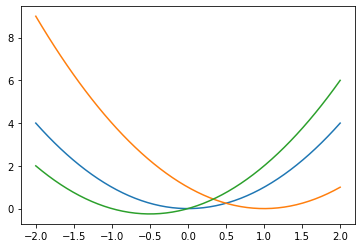

In [5]:
x = np.linspace(-2,2)
plt.plot(x, x**2)
plt.plot(x, (x-1)**2)
plt.plot(x, x+ x**2)